First, the necessary libraries are imported.
The Dataframe is loaded and the first 10 rows are displayed, as well as the type of the columns.
In the next step, all duplicates in the file are removed.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('visit_data.csv')
df = pd.DataFrame(data)

print(data.head(10))
print(data.dtypes)

data = data.drop_duplicates() #drops all the duplicates


            Patient     Visit_Reason        Date  Visit_Duration
0       David Moore            Cough  2022-01-05              17
1       Ivy Johnson           Injury  2022-10-20              51
2     Hannah Miller         Headache  2022-08-24              25
3        Ivy Wilson          Allergy  2022-08-25              26
4  Charlie Williams  Routine Checkup  2022-10-27              25
5     Charlie Davis           Injury  2022-05-20              39
6        Ivy Miller         Headache  2022-02-20              16
7         Ivy Smith           Injury  2022-11-07              57
8        Jack Moore            Cough  2022-07-14              22
9         Bob Davis            Fever  2022-01-20              30
Patient           object
Visit_Reason      object
Date              object
Visit_Duration     int64
dtype: object


Next, a list is created containing all the reasons for a visit to the doctor, as well as the number of visits per reason. 
The list is printed to ascertain that it is correctly filled.


In [62]:
#make a list with the visit reasons and count the occurences of said reasons
visit_reason_list = data.Visit_Reason.value_counts()
index = visit_reason_list.index
values = visit_reason_list.values
calculated_list = []
print(visit_reason_list)


Headache           1723
Allergy            1679
Routine Checkup    1673
Injury             1664
Cough              1635
Fever              1610
Name: Visit_Reason, dtype: int64

This code iterates on the elements in the list and creates a string containing the name, number of visits, mean, maximum and minimum for each reason.
This string is then appendet to a list.

In [63]:
for sickness, visits in visit_reason_list.items():
    formatted_string = f"{visits} visits were due to {sickness}. "
    mask = data.Visit_Reason == sickness 
    mean_sickness = data.loc[mask, 'Visit_Duration'].mean().round(decimals=1)
    max_sickness = data.loc[mask, 'Visit_Duration'].max()
    min_sickness = data.loc[mask, 'Visit_Duration'].min()
    row_sickness= ','.join([str(sickness),str(visits),str(mean_sickness),str(max_sickness),str(min_sickness)])
    calculated_list.append(row_sickness)

In the next step, the list is saved in a csv file named calculations.csv. 

In [74]:
with open('calculations.csv', 'w') as file: #saves the list of the calculated values to a csv file
    file.write("Visit_Reason,Visits,Mean_Duration,Max_Duration,Min_Duration\n")
    file.write("\n".join(calculated_list))

In this step, a bar plot is created using the seaborn library. The rows are grouped by reason of visit and a mean is calculated for each reason. 

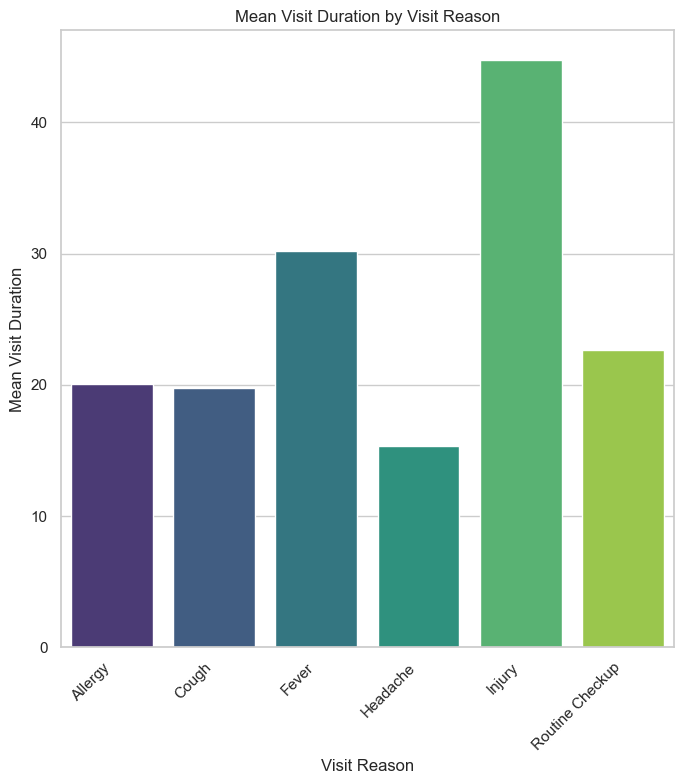

In [76]:
mean_durations = data.groupby('Visit_Reason')['Visit_Duration'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(7, 8))
sns.barplot(x='Visit_Reason', y='Visit_Duration', data=mean_durations, palette='viridis')

# Adding labels and title
plt.xlabel('Visit Reason')
plt.ylabel('Mean Visit Duration')
plt.title('Mean Visit Duration by Visit Reason')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

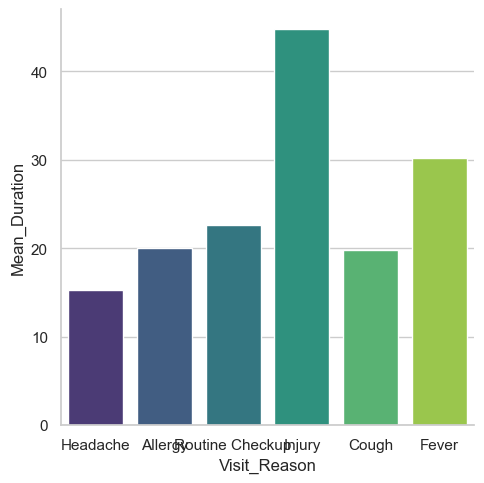

In [77]:
calculated_data = pd.read_csv('calculations.csv')
calculated_data = pd.DataFrame(calculated_data)

sns.set(style="whitegrid")  # Set the overall style
sns.catplot(data=calculated_data, kind="bar", x="Visit_Reason", y="Mean_Duration", palette='viridis')
plt.show() #shows the graph of the mean duration of the visits per sickness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


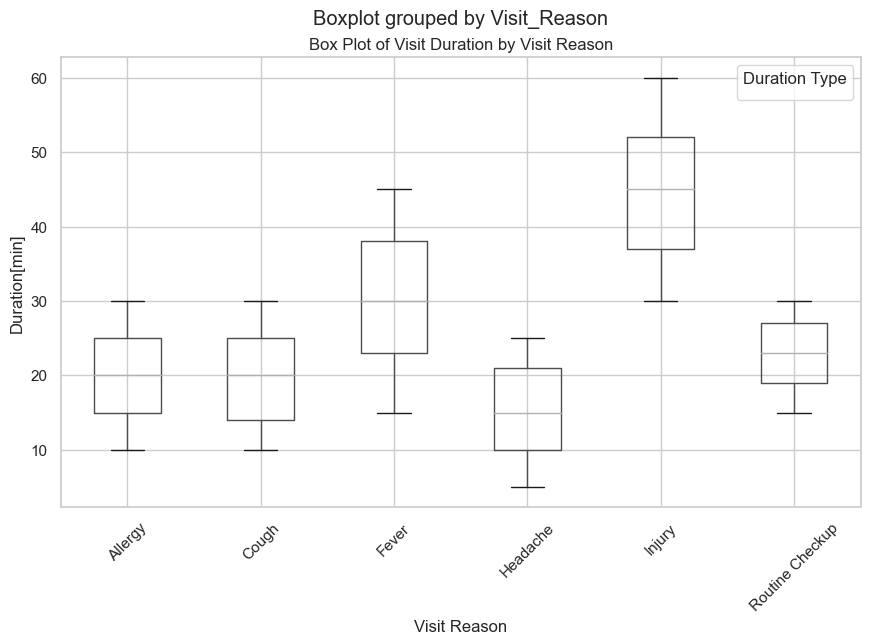

In [57]:

print(data.groupby('Visit_Reason'))
# Grouping the data by 'Visit_Reason' and plotting box plots for each group
# Calculate the min and max duration for each Visit_Reason
grouped = data.groupby('Visit_Reason')['Visit_Duration'].agg(Min_Duration='min', Max_Duration='max')

# Create a bar plot for Min_Duration and Max_Duration for each Visit_Reason
color=["4DBBB4"]
fig, ax = plt.subplots(figsize=(10, 6))
data.boxplot(column='Visit_Duration', by='Visit_Reason', ax=ax)
plt.title('Box Plot of Visit Duration by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration[min]')
plt.xticks(rotation=45)
plt.legend(title='Duration Type')
plt.show()




      Visit_Reason  Visits  Mean_Duration  Max_Duration  Min_Duration
0         Headache    1723           15.3            25             5
1          Allergy    1679           20.0            30            10
2  Routine Checkup    1673           22.6            30            15
3           Injury    1664           44.8            60            30
4            Cough    1635           19.8            30            10
Visit_Reason      object
Visits             int64
Mean_Duration    float64
Max_Duration       int64
Min_Duration       int64
dtype: object


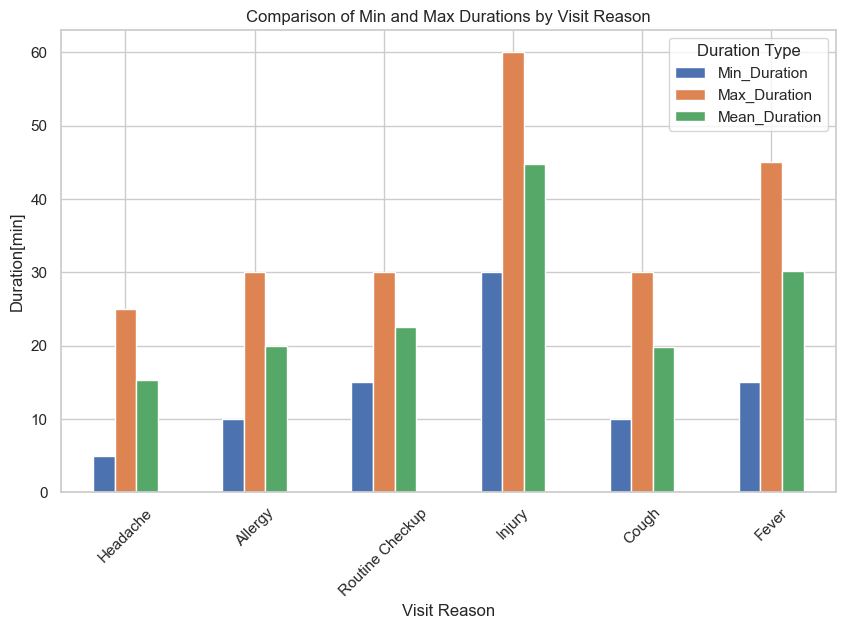

In [58]:
calculated_data = pd.read_csv('calculations.csv')
calculated_data = pd.DataFrame(calculated_data)
print(calculated_data.head())
print(calculated_data.dtypes)


calculated_data.set_index('Visit_Reason', inplace=True)

# Create a bar plot for Min_Duration and Max_Duration
fig, ax = plt.subplots(figsize=(10, 6))

calculated_data[['Min_Duration', 'Max_Duration',"Mean_Duration"]].plot(kind='bar', ax=ax)
plt.title('Comparison of Min and Max Durations by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration[min]')
plt.xticks(rotation=45) 
plt.legend(title='Duration Type')
plt.show()
